In [2]:
#imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_log_error, make_scorer
import matplotlib.pyplot as plt

Step 1 : Load and check data

In [3]:
df = pd.read_csv('mydata/movie/train.csv', index_col='id')
df.shape

(3000, 22)

In [4]:
df.describe()

,budget,popularity,runtime,revenue
count,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,2.253133e+07,8.463274,107.856571,6.672585e+07
std,3.702609e+07,12.104000,22.086434,1.375323e+08
min,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3.800000e+08,294.337037,338.000000,1.519558e+09


Insights: 1) Budget=0 and runtime=0 is not possible

Step 2: Data Cleaning

In [5]:
#check missing data
df.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
title                       0
imdb_id                     0
budget                      0
popularity                  0
original_language           0
original_title              0
status                      0
release_date                0
revenue                     0
dtype: int64

In [6]:
df.loc[16,'revenue'] = 192864          # Skinning
df.loc[90,'budget'] = 30000000         # Sommersby          
df.loc[118,'budget'] = 60000000        # Wild Hogs
df.loc[149,'budget'] = 18000000        # Beethoven
df.loc[313,'revenue'] = 12000000       # The Cookout 
df.loc[451,'revenue'] = 12000000       # Chasing Liberty
df.loc[464,'budget'] = 20000000        # Parenthood
df.loc[470,'budget'] = 13000000        # The Karate Kid, Part II
df.loc[513,'budget'] = 930000          # From Prada to Nada
df.loc[797,'budget'] = 8000000         # Welcome to Dongmakgol
df.loc[819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
df.loc[850,'budget'] = 90000000        # Modern Times
df.loc[1007,'budget'] = 2              # Zyzzyx Road 
df.loc[1112,'budget'] = 7500000        # An Officer and a Gentleman
df.loc[1131,'budget'] = 4300000        # Smokey and the Bandit   
df.loc[1359,'budget'] = 10000000       # Stir Crazy 
df.loc[1542,'budget'] = 1              # All at Once
df.loc[1570,'budget'] = 15800000       # Crocodile Dundee II
df.loc[1571,'budget'] = 4000000        # Lady and the Tramp
df.loc[1714,'budget'] = 46000000       # The Recruit
df.loc[1721,'budget'] = 17500000       # Cocoon
df.loc[1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
df.loc[1885,'budget'] = 12             # In the Cut
df.loc[2091,'budget'] = 10             # Deadfall
df.loc[2268,'budget'] = 17500000       # Madea Goes to Jail budget
df.loc[2491,'budget'] = 6              # Never Talk to Strangers
df.loc[2602,'budget'] = 31000000       # Mr. Holland's Opus
df.loc[2612,'budget'] = 15000000       # Field of Dreams
df.loc[2696,'budget'] = 10000000       # Nurse 3-D
df.loc[2801,'budget'] = 10000000       # Fracture
df.loc[335,'budget'] = 2 
df.loc[348,'budget'] = 12
df.loc[470,'budget'] = 13000000 
df.loc[513,'budget'] = 1100000
df.loc[640,'budget'] = 6 
df.loc[696,'budget'] = 1
df.loc[797,'budget'] = 8000000 
df.loc[850,'budget'] = 1500000
df.loc[1199,'budget'] = 5 
df.loc[1282,'budget'] = 9               # Death at a Funeral
df.loc[1347,'budget'] = 1
df.loc[1755,'budget'] = 2
df.loc[1801,'budget'] = 5
df.loc[1918,'budget'] = 592 
df.loc[2033,'budget'] = 4
df.loc[2118,'budget'] = 344 
df.loc[2252,'budget'] = 130
df.loc[2256,'budget'] = 1 
df.loc[2696,'budget'] = 10000000


In [7]:
target = np.log1p(df.revenue)

In [8]:
df.loc[df["popularity"]>20, "popularity"] = 20
#fix missing data and =0 for numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for column in df.select_dtypes(include=numerics).columns:
    df[column].replace(np.nan, df[column].median(), inplace=True)

df.loc[df.budget==0, "budget"] = df.budget.median()
df.loc[df.runtime==0,"runtime"] = df.runtime.median()

<function matplotlib.pyplot.show(*args, **kw)>

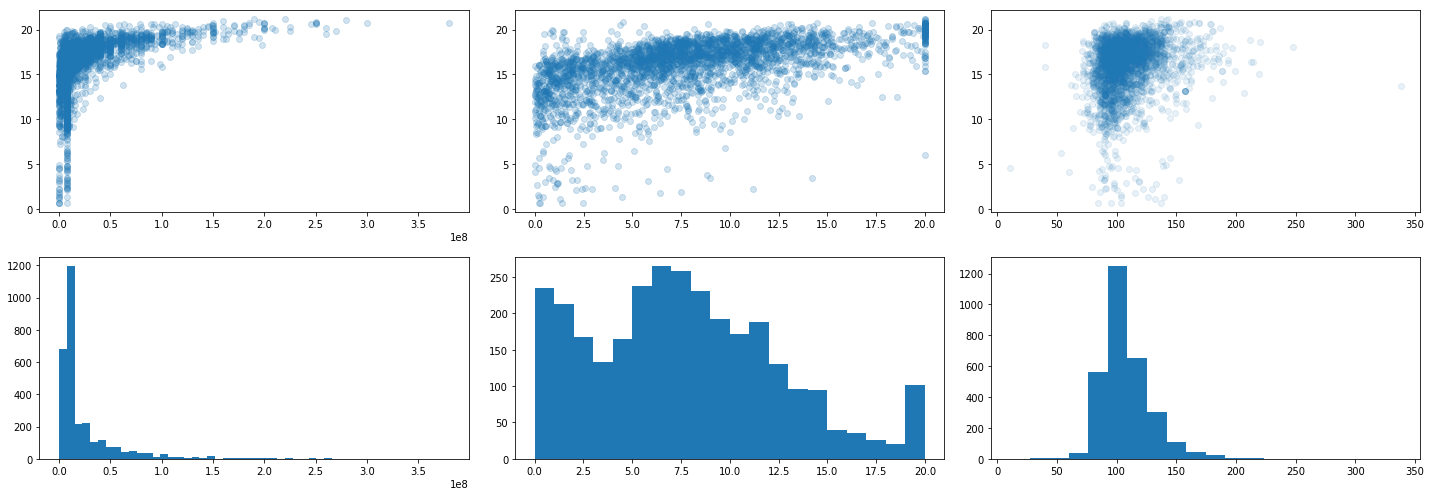

In [9]:
#fix missing data and =0 for numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numNumericCol = df.select_dtypes(include=numerics).columns
fig, axes = plt.subplots(2,3,figsize=(20,7))
axes[0,0].scatter(df["budget"],target, alpha=0.2)
axes[0,1].scatter(df["popularity"],target, alpha=0.2)
axes[0,2].scatter(df["runtime"],target, alpha=0.1)
axes[1,0].hist(df["budget"],bins=50)
axes[1,1].hist(df["popularity"],bins=20)
axes[1,2].hist(df["runtime"],bins=20)
plt.tight_layout()
plt.show


SteVisualize all numeric data

In [10]:
#analyse release date
releaseDate = pd.to_datetime(df['release_date']) 
df["day"] = releaseDate.dt.dayofweek
year = releaseDate.dt.year
#some years are >2020 --> subtract 100
year[year>2020] = year[year>2020]-100
df["year"] = year

#df.groupby("year").revenue.mean().plot()
#plt.show()
#df.groupby("day").day.count().plot()
#plt.show()

C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._update_inplace(new_data)


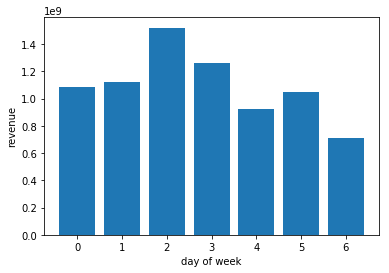

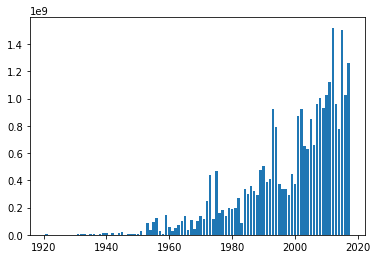

In [11]:
plt.bar(df["day"],df["revenue"])
plt.xlabel("day of week")
plt.ylabel("revenue")
plt.show()

plt.bar(df["year"],df["revenue"])
plt.show()

In [12]:
#construct new feature for weekends and age
df["Age"] = year.max() - year

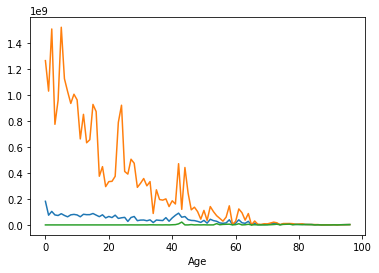

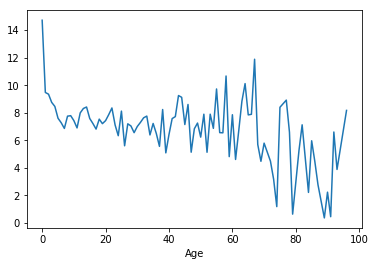

In [13]:
#some more analysyis on numeric data
df.groupby("Age").revenue.mean().plot()
df.groupby("Age").revenue.max().plot()
df.groupby("Age").revenue.min().plot()
plt.show()
df.groupby("Age").popularity.mean().plot()
plt.show()

In [14]:
#analyse Genres
#idea: construct binary features of those genres with mean revenue significantly different from average revenue
#1) create list of all mentioned genres
df.genresList = df.genres.str.strip('[]')
df.genresList[df.genresList.isnull()] = ''
genres_list = pd.Series(list(set(", ".join(df.genresList.unique().tolist()).split('}, ')))).str.split("'name': '").str[1].str.split("'").str[0].tolist()

#2) create a dataframe with each genre as binary feature
gFrame = pd.DataFrame()
for genre in genres_list:
    gFrame[genre] = df.genres.str.contains(genre)
    
gFrame["numberGenres"] = gFrame.sum(axis = 1)
gFrame["revenue"] = df.revenue
    
    
#3) do a t-test to find genres with a significant differences
from scipy.stats import ttest_ind
tFrame = pd.DataFrame(columns=["genre","tValue", "count"])
for genre in genres_list:
    testYes = gFrame.loc[gFrame[genre] == True, "revenue"]
    testNo = gFrame.loc[gFrame[genre] == False, "revenue"]
    t, p = ttest_ind(testYes, testNo, equal_var=False)
    tFrame.loc[tFrame.shape[0]] = [genre, p, len(testYes)]
    
#4) select all genres with at least 100 occurences and a significant t-test (p<0.01)
significantGenres = tFrame.loc[(tFrame["tValue"]<0.01) & (tFrame["count"]>100), "genre"].tolist()
significantGenres += "numberGenres"

#5) create binary features for these genres
gFrame.drop((g for g in genres_list if g not in significantGenres), inplace=True, axis=1)
gFrame.drop("revenue", inplace=True, axis=1)
gFrame = gFrame.fillna(False)
gFrame.head()

C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value enco

,Action,Family,Adventure,History,Drama,Science Fiction,Romance,Fantasy,Horror,Animation,numberGenres
id,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,1.0
2,False,True,False,False,True,False,True,False,False,False,4.0
3,False,False,False,False,True,False,False,False,False,False,1.0
4,False,False,False,False,True,False,False,False,False,False,2.0
5,True,False,False,False,False,False,False,False,False,False,2.0


In [15]:
#analyse cast
#idea: construct a binary feature of whether a movie contains a "star" 
#a star is defined as an actor that appeared in 10 or more movies
df.loc[df.cast.isnull(), "cast"] = ''
castList = df.cast.str.strip('[]')
listOfallActors = pd.Series(pd.Series(list(", ".join(castList.unique().tolist()).split('}, '))).str.split("'name': '").str[1].str.split("'").str[0].tolist())

allActors = listOfallActors.value_counts()
topActors = allActors[allActors>=10].index

df['hasStar'] = df.cast.apply(lambda row: 1 if any(act in row for act in topActors) else 0)

df.groupby("hasStar").revenue.mean()

hasStar
0    2.705656e+07
1    9.066042e+07
Name: revenue, dtype: float64

In [16]:
df['NumStar']= df.cast.apply(lambda row: sum(act in row for act in topActors))

In [17]:
#analyse cast
#idea: construct a binary feature of whether a movie contains a "star" 
#a star is defined as an actor that appeared in 10 or more movies
df.Keywords[df.Keywords.isnull()] = ''
keywordList = df.Keywords.str.strip('[]')
keywordList = pd.Series(pd.Series(list(", ".join(keywordList.unique().tolist()).split('}, '))).str.split("'name': '").str[1].str.split("'").str[0].tolist())

allKeywords = keywordList.value_counts()
topKeywords= allKeywords[allKeywords>=10].index

df['hasTopKeyWord'] = df.Keywords.apply(lambda row: 1 if any(act in row for act in topKeywords) else 0)
#df.Keywords.apply(lambda row: 1 if any(act in row for act in topKeywords) else 0).sum()/len(df.Keywords)
#df['hasStar'] = df.cast.apply(lambda row: 1 if any(act in row for act in topActors) else 0)
#df.groupby("hasStar").revenue.mean()
df.groupby("hasTopKeyWord").revenue.mean()

C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


hasTopKeyWord
0    2.436401e+07
1    7.399390e+07
Name: revenue, dtype: float64

Insight: Movies with a star have significantly more revenue

In [18]:
#Feature homepage
df["hashomepage"] = ~(df["homepage"].isna())
df.groupby("hashomepage").revenue.mean()

hashomepage
False    4.210135e+07
True     1.200519e+08
Name: revenue, dtype: float64

Finding: Movies with a hompage have a higher revenue

In [19]:
#Feature belons to collection
df["isinCollection"] = ~(df["belongs_to_collection"].isna())
df.groupby("isinCollection").revenue.mean()

isinCollection
False    4.330169e+07
True     1.594279e+08
Name: revenue, dtype: float64

Finding: Movies that are part of a collection have a higher revenue

In [20]:
#normalize the budget
budgetPerYear = df.groupby(releaseDate.dt.year).budget.mean()
yearBudget = budgetPerYear[year]
df["normalizedBudget"] = df["budget"].div(yearBudget.values)
df["normalizedBudget"]= df["normalizedBudget"].fillna(1)
df["normalizedBudgetLog"]=np.log1p(df["normalizedBudget"])
df["budgetlog"] = np.log1p(df["budget"])
df["popularitylog"] = np.log1p(df["popularity"])
df["budgetPop"] = df["budgetlog"]*df["popularitylog"]

C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


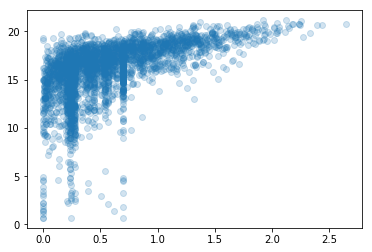

In [21]:
plt.scatter(np.log1p(df["normalizedBudget"]), np.log1p(df["revenue"]), alpha=0.2)
plt.show()

In [22]:
for column in df.select_dtypes(include=numerics).columns:
    print(column,": ",np.log1p(df["revenue"]).corr(df[column]))

budget :  0.46937712028952894
popularity :  0.5252575494485959
runtime :  0.2038103562524861
revenue :  0.5038051527291745
day :  -0.04457170497809633
year :  0.036518449563587636
Age :  -0.036518449563587595
hasStar :  0.3382014311803551
NumStar :  0.3715572122991166
hasTopKeyWord :  0.23577539340984124
normalizedBudget :  0.4790900618336261
normalizedBudgetLog :  0.5457085172732704
budgetlog :  0.588433584859736
popularitylog :  0.5464805640423016
budgetPop :  0.6238931531074438


In [23]:
#construct the dataframe for all features
target = df["revenue"]
#usedfeatures = ['budgetlog', 'popularitylog', 'runtime', 'releasedOnWeekend', 'Age','hasStar', "hashomepage", "isinCollection"]
usedfeatures = ['budgetlog', "normalizedBudgetLog", 'popularitylog', "budgetPop", 'runtime', 'Age','hasStar','NumStar', "hashomepage", "isinCollection"]
features = df[usedfeatures]
features = features.merge(gFrame, on=['id'], how='left')
features.head(2)

,budgetlog,normalizedBudgetLog,popularitylog,budgetPop,runtime,Age,hasStar,NumStar,hashomepage,isinCollection,...,Family,Adventure,History,Drama,Science Fiction,Romance,Fantasy,Horror,Animation,numberGenres
id,,,,,,,,,,,,,,,,,,,,,
1,16.454568,0.355784,2.024905,33.318941,93.0,2,1,2,False,True,...,False,False,False,False,False,False,False,False,False,1.0
2,17.504390,0.781577,2.224504,38.938587,113.0,13,0,0,False,True,...,True,False,False,True,False,True,False,False,False,4.0


In [25]:
#normalize all features to the same range [0,1]
from sklearn import preprocessing
x = features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
featuresNormalized = pd.DataFrame(x_scaled, columns=features.columns)
featuresNormalized.head(2)

C:\Users\FArnold\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,budgetlog,normalizedBudgetLog,popularitylog,budgetPop,runtime,Age,hasStar,NumStar,hashomepage,isinCollection,...,Family,Adventure,History,Drama,Science Fiction,Romance,Fantasy,Horror,Animation,numberGenres
0,0.826827,0.134684,0.665098,0.553962,0.250765,0.020833,1.0,0.153846,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857
1,0.881900,0.295871,0.730658,0.647394,0.311927,0.135417,0.0,0.000000,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.571429


In [41]:
# Define own scoring function
# because target is actually log(target)
def my_score(y_true, y_pred):
    '''
    Compute the RMSLE on the actual target values, not the log target
    '''
    return np.sqrt(mean_squared_log_error(np.exp(y_true)-1, np.exp(y_pred)-1))

# Create callable scoring function
scoring_fnc = make_scorer(my_score)

X_train = features
y_train = target
reg = RandomForestRegressor(n_estimators=50, max_depth=10)

from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=2, interaction_only=True)
#X_trainPoly = poly.fit_transform(X_train) 

# Do CV
cv_results = cross_validate(reg, X_train, np.log1p(y_train), cv=5, scoring=scoring_fnc, 
                            return_train_score=True, )

# Display the individual results + mean/std
display(pd.DataFrame(cv_results)[['train_score', 'test_score']])
means = [
    np.mean(cv_results['train_score']),
    np.mean(cv_results['test_score'])
]
stds = [
    np.std(cv_results['train_score']),
    np.std(cv_results['test_score'])
]

result_summary = {'mean': means, 'std': stds}
display(pd.DataFrame(result_summary, index=['train_score', 'test_score']))

,train_score,test_score
0,1.226894,2.038544
1,1.172809,2.127439
2,1.221527,1.878387
3,1.280355,1.910843
4,1.250065,1.907860


,mean,std
train_score,1.230330,0.035468
test_score,1.972615,0.095084


In [ ]:
cv_results.keys()

In [ ]:
y_train.head()

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Define own scoring function
# because target is actually log(target)
def my_score(y_true, y_pred):
    '''
    Compute the RMSLE on the actual target values, not the log target
    '''
    return np.sqrt(mean_squared_log_error(np.exp(y_true)-1, np.exp(y_pred)-1))

# Create callable scoring function
scoring_fnc = make_scorer(my_score)

#Define the tested models and parameters
models = (RandomForestRegressor(), DecisionTreeRegressor(), svm.SVR(), Lasso(alpha=0.7))
parameters = ({'max_depth' : [3,4,5,6,7,8], 'n_estimators' : [10,20,50]}, 
            {'max_depth' : [3,4,5,6,7,8]}, 
            {'C' : [2,5,10,20,60]},  
            {'alpha' : [0.1,0.5,1,2,5,10,20]})
#rng = np.random.RandomState(1)
#reg = 
#reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), random_state=rng)
#reg = DecisionTreeRegressor()#svm.SVR() #Lasso(alpha=0.7)
#reg2 = linear_model.Ridge()

X_train = featuresNormalized
y_train = target





In [37]:
for i in range(0,1):
    clf = GridSearchCV(models[i], cv=5, scoring=scoring_fnc, param_grid=parameters[i])
    clf.fit(X_train, np.log1p(y_train))
    print(clf.best_params_)
    print(clf.cv_results_['mean_test_score'])
    #print(clf.best_estimator_)

{'max_depth': 3, 'n_estimators': 20}
[2.12203885 2.13245215 2.11937651 2.05978564 2.05576722 2.0577051
 2.01599361 2.03224423 2.01218628 2.00869226 1.99504995 1.98958899
 2.01652972 1.98960852 1.98241    2.01865681 1.98370168 1.96651953]
